# Analysation of the results

This notebook is created to visualize our results and conclusions for the non-deep learning approach.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_all = pd.read_csv("../data/results_all.csv", index_col=0)
results_tuned = pd.read_csv("../data/results_tuned.csv", index_col= 0)
results_restricted = pd.read_csv("../data/results_restricted.csv", index_col= 0)

In [3]:
results_all

,Train,Validation,Test
recall,0.818047,0.817717,0.817013
precision,0.760904,0.723991,0.726342
accuracy,0.780498,0.752988,0.754597
f1,0.788441,0.768005,0.769014
roc_auc,0.780498,0.752988,0.754597


## Visualize the results

In [4]:
results_overview = pd.DataFrame(columns=["Default RandomForest", "Tuned RandomForest", "Restricted number of features for RF"])
results_overview.loc["accuracy"] = [results_all.loc["accuracy", "Test"], results_tuned.loc["accuracy", "Test"], results_restricted.loc["accuracy", "Test"]]
results_overview.loc["precision"] = [results_all.loc["precision", "Test"], results_tuned.loc["precision", "Test"], results_restricted.loc["precision", "Test"]]
results_overview.loc["recall"] = [results_all.loc["recall", "Test"], results_tuned.loc["recall", "Test"], results_restricted.loc["recall", "Test"]]
results_overview.loc["f1"] = [results_all.loc["f1", "Test"], results_tuned.loc["f1", "Test"], results_restricted.loc["f1", "Test"]]
results_overview.loc["auc"] = [results_all.loc["roc_auc", "Test"], results_tuned.loc["roc_auc", "Test"], results_restricted.loc["roc_auc", "Test"]]
results_overview = results_overview.T
results_overview

,accuracy,precision,recall,f1,auc
Default RandomForest,0.754597,0.726342,0.817013,0.769014,0.754597
Tuned RandomForest,0.754563,0.725976,0.817817,0.769164,0.754563
Restricted number of features for RF,0.633903,0.683968,0.497833,0.576242,0.633903


C:\Users\zsomb\AppData\Local\Temp\ipykernel_20748\2319282234.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


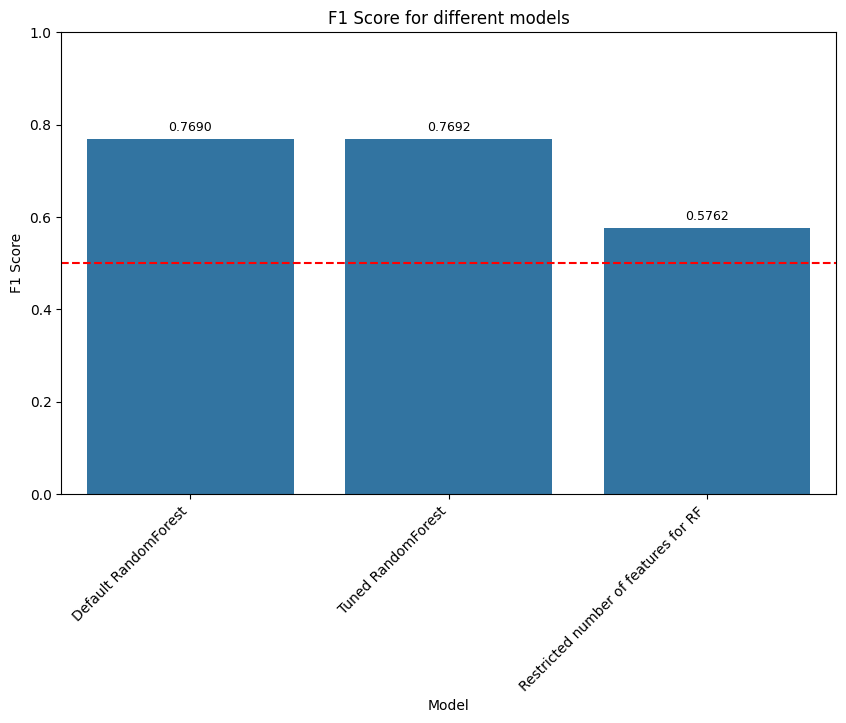

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = results_overview.index , y=results_overview.f1)
ax.set(ylim=(0, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('F1 Score for different models')
ax.axhline(y=0.5, color='red', linestyle='--', label='F1 = 0.5')
ax.set_xlabel('Model') 
ax.set_ylabel('F1 Score') 
for index, value in enumerate(results_overview['f1']):
    ax.text(index, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=9)
plt.show()

Adding manually the auc results of the deep-learning approach.
The original results is found in the notebook *dl1_v2_graphsage_heterodata.ipnyb*.

In [20]:
auc_scores = results_overview.auc
auc_scores["DL1 v2 heterodata"] = 0.9234
auc_scores = auc_scores.sort_values()

C:\Users\zsomb\AppData\Local\Temp\ipykernel_20748\3075956845.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


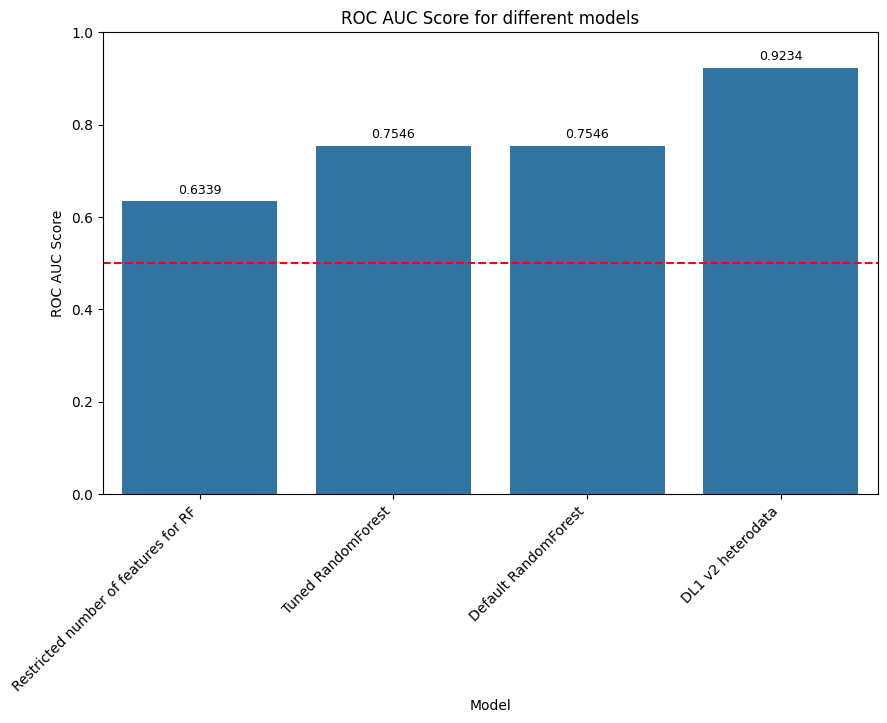

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = auc_scores.index , y=auc_scores)
ax.set(ylim=(0, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('ROC AUC Score for different models')
ax.axhline(y=0.5, color='red', linestyle='--', label='F1 = 0.5')
ax.set_xlabel('Model') 
ax.set_ylabel('ROC AUC Score') 
for index, value in enumerate(auc_scores):
    ax.text(index, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=9)
plt.show()